In [1]:
from graph_tool.all import *

import random

import numpy as np

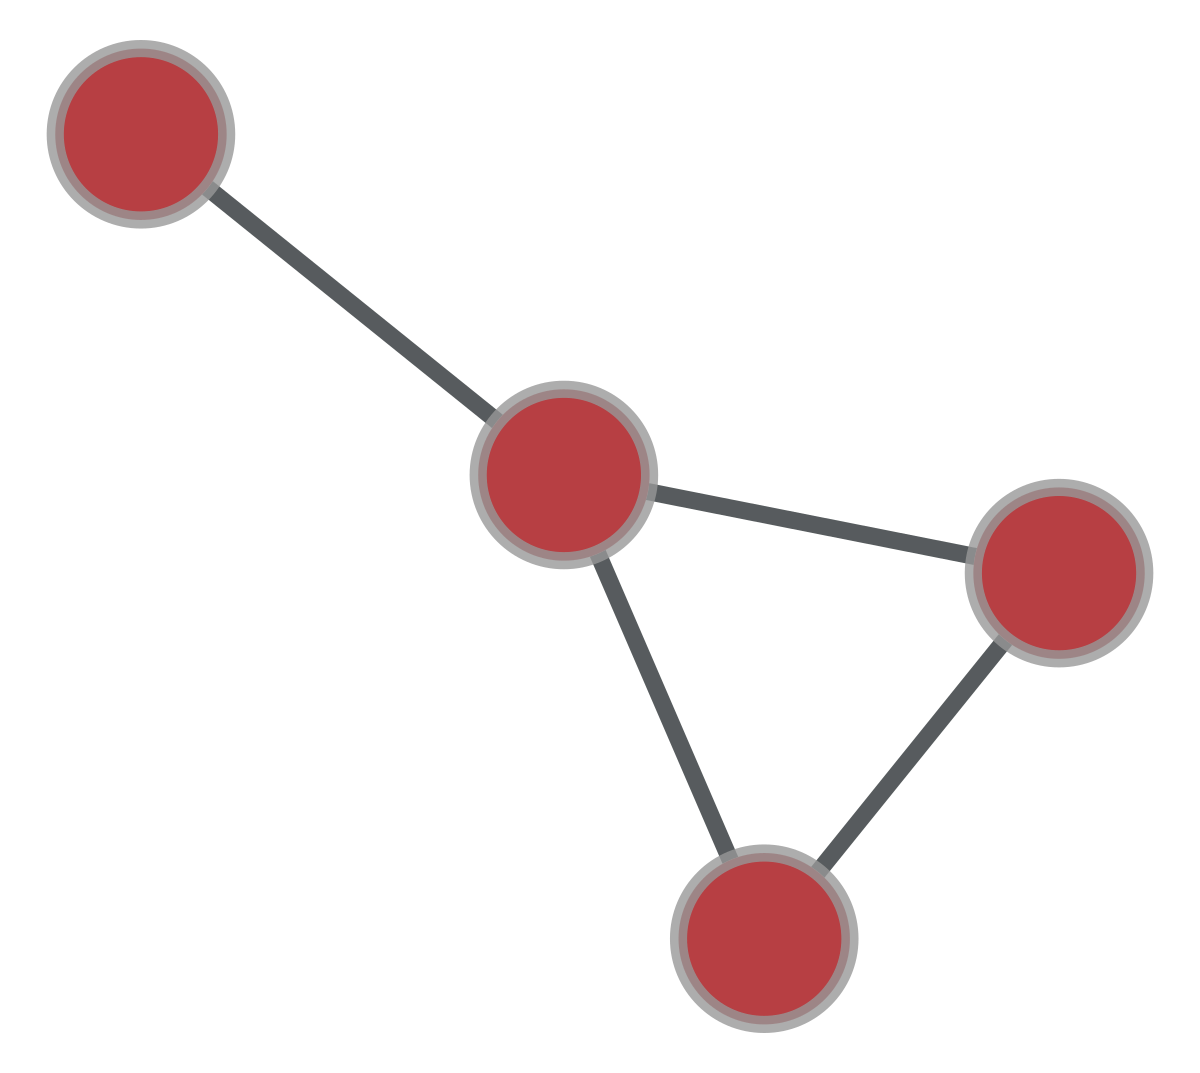

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ad7a3470, at 0x7fd0ad7a34a8>

In [2]:
"""
Very basic graph:
n = 4
m = 4
"""

# create graph
g = Graph(directed=False)

# add nodes
v1 = g.add_vertex()
v2 = g.add_vertex()
v3 = g.add_vertex()
v4 = g.add_vertex()

# add edges
e1 = g.add_edge(v1, v2)
e2 = g.add_edge(v2, v3)
e3 = g.add_edge(v1, v3)
e4 = g.add_edge(v3, v4)

# output graph
graph_draw(g)

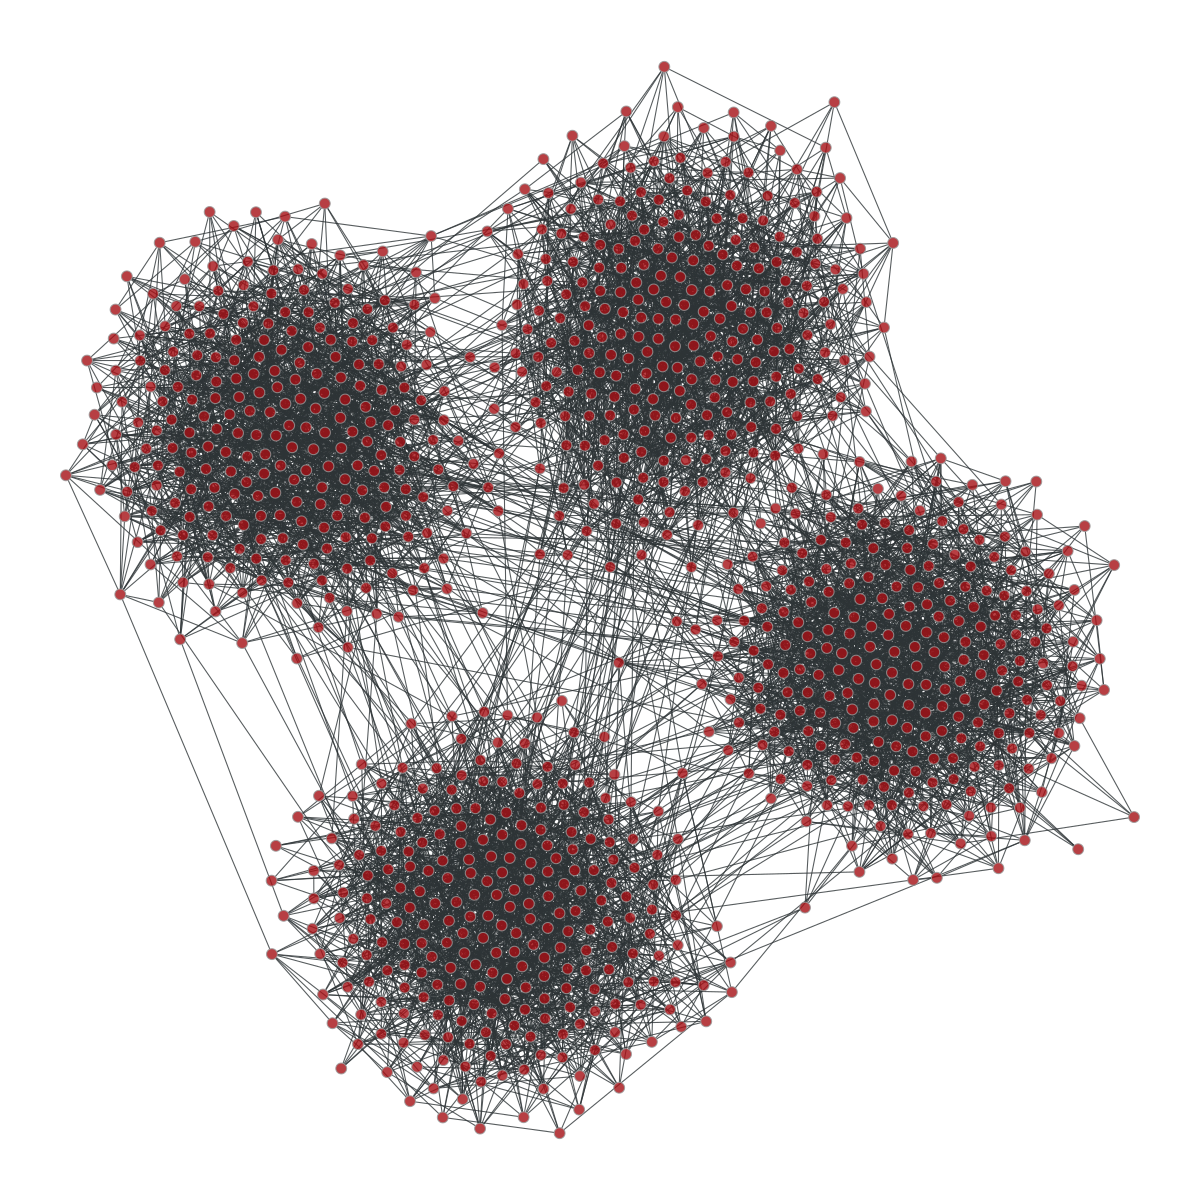

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac17fd68, at 0x7fd0ac17ff60>

In [3]:
n = 1000
p_inner = 1/20
p_outer = 1/1000  

# Additional example: 
# closer values of edge probabilities
#p_outer = 1/160

# create graph
g = Graph(directed=False)

# add nodes
for _ in range(n):
    g.add_vertex()
    
# add edges
for v1 in g.vertices():    
    for v2 in g.vertices():
        
        if v1 <= v2:
            continue
        
        # graph-tool automatically indexes nodes from 0 to n-1
        # we draw edges based on node indices:
        #
        # - nodes 0, 4, 8, ...  belong to group 1
        # - nodes 1, 5, 9, ...  belong to group 2
        # - nodes 2, 6, 10, ... belong to group 3
        # - nodes 3, 7, 11, ... belong to group 4

        if (int(v1) % 4) == (int(v2) % 4):
            if random.random() <= p_inner:
                g.add_edge(v1, v2)        
        else:
            if random.random() <= p_outer:
                g.add_edge(v1, v2)

# save graph layout for consistent visualizations
pos = sfdp_layout(g)

# output graph
graph_draw(g, pos=pos)

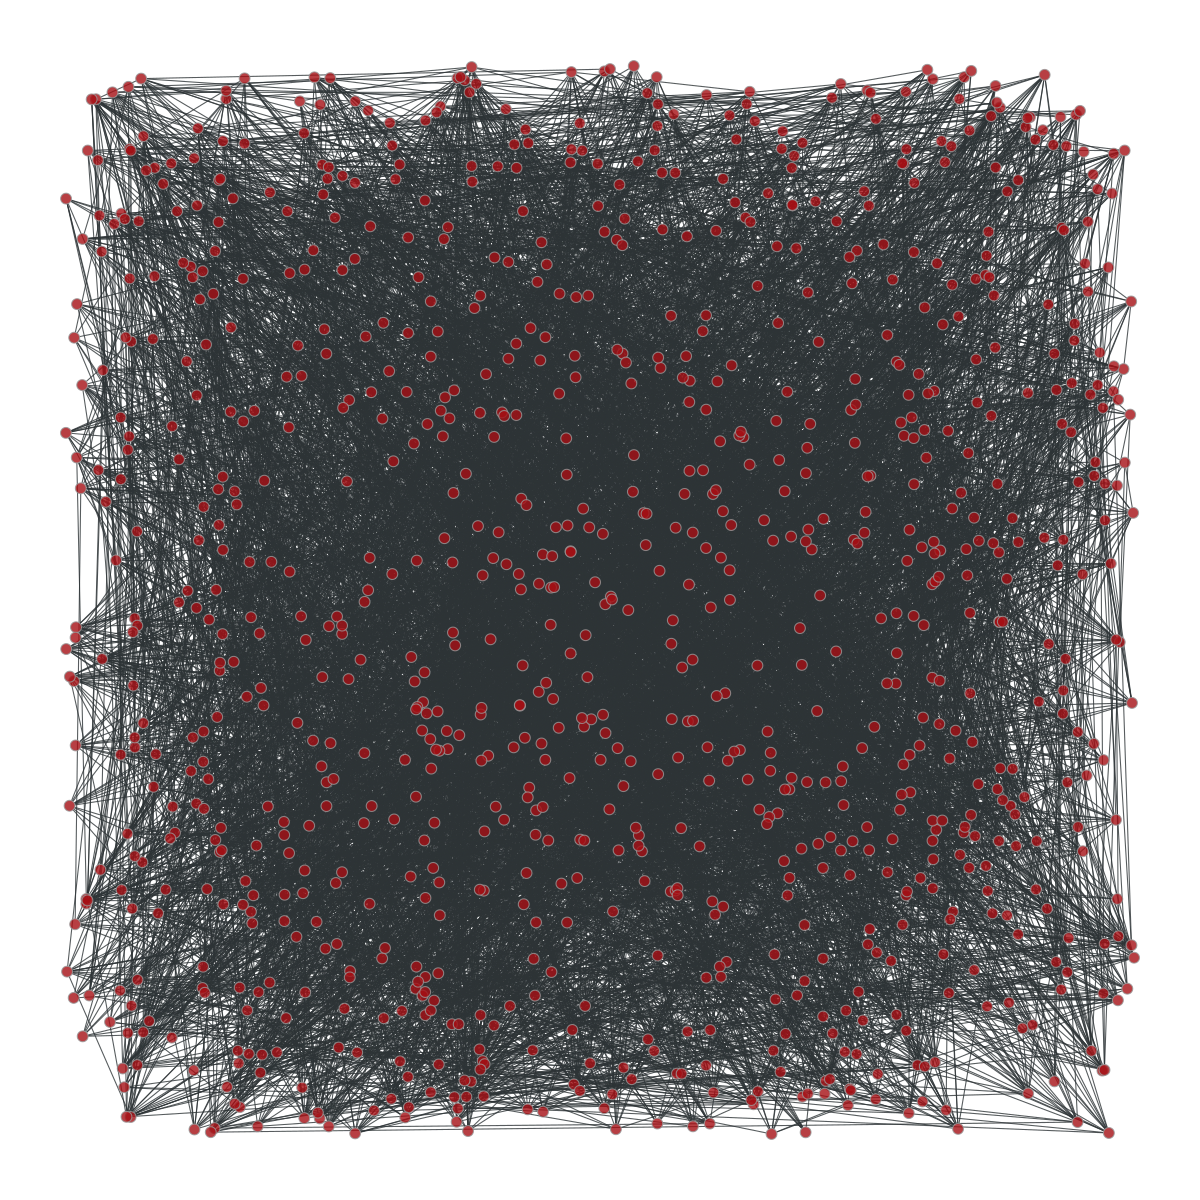

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac17fd68, at 0x7fd0ad79cba8>

In [4]:
# since sfdp_layout automatically notices group structure
# we also check how the graph looks with a random layout
pos_2 = random_layout(g)
graph_draw(g, pos=pos_2)

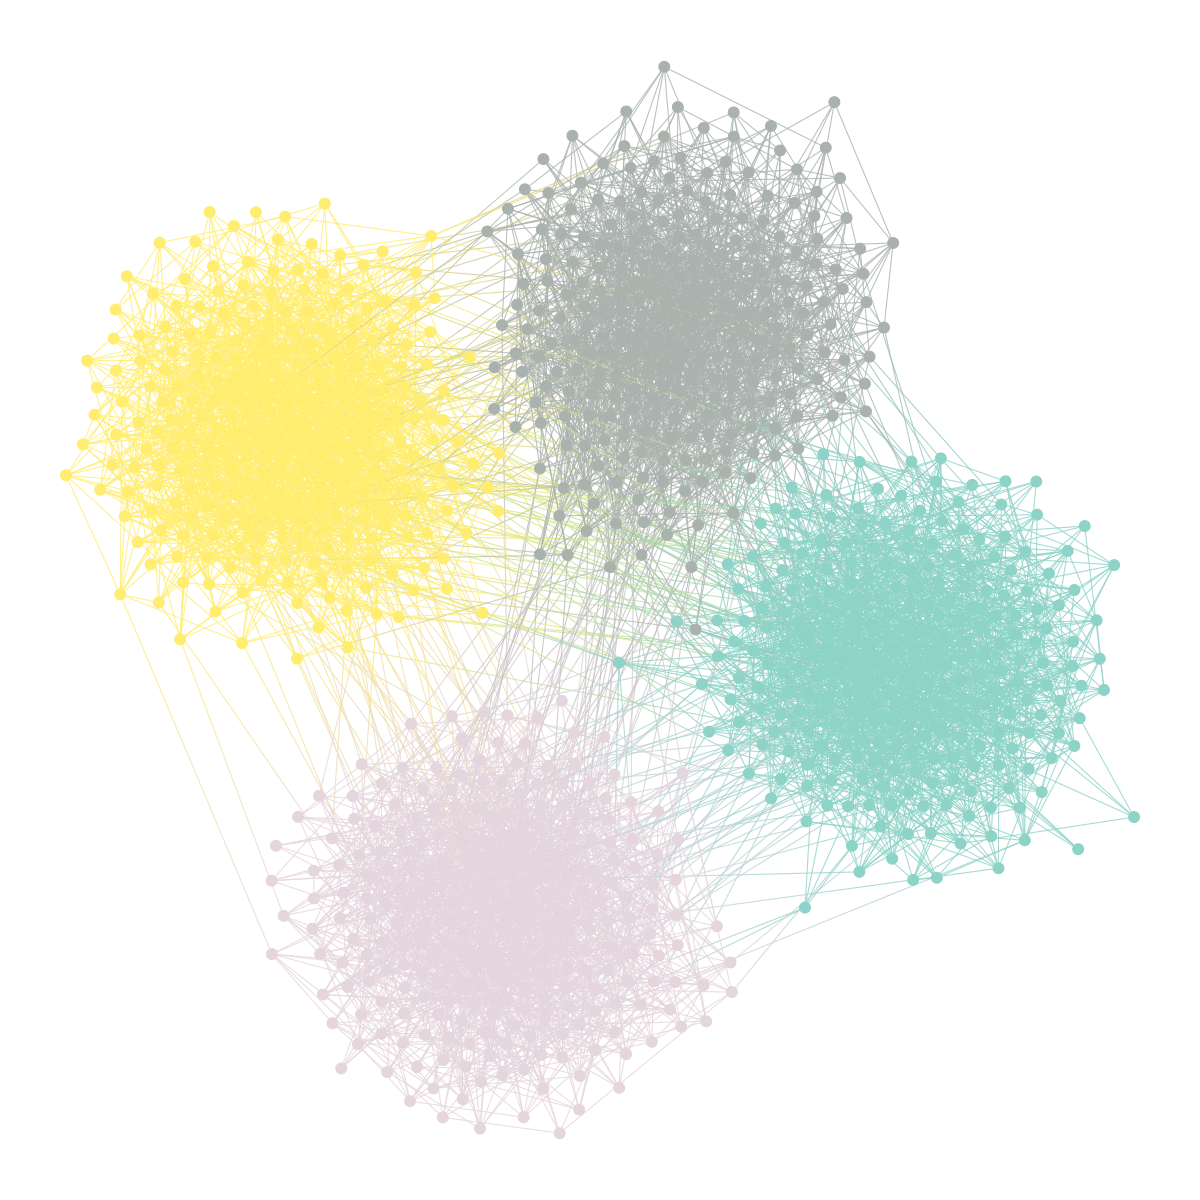

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac17fd68, at 0x7fd0ac1b7780>

In [5]:
# perform classic SBM inference
state = minimize_blockmodel_dl(g, B_min=4, B_max=4, deg_corr=False)
state.draw(pos=pos)

In [6]:
# calculate the percentage of correctly grouped nodes
n_corr = sum([1 if int(v) % 4 == b else 0 for v, b in zip(g.vertices(), state.get_blocks())])
n = g.num_vertices()

print(f"Percentage of correctly grouped vertices: {100 * n_corr / n}% ({n_corr}/{n})")

Percentage of correctly grouped vertices: 100.0% (1000/1000)


In [7]:
"""
SBM inference on Zachary karate network
"""

# load graph
g = collection.data["karate"]

# save graph layout for consistent visualizations
pos = sfdp_layout(g)

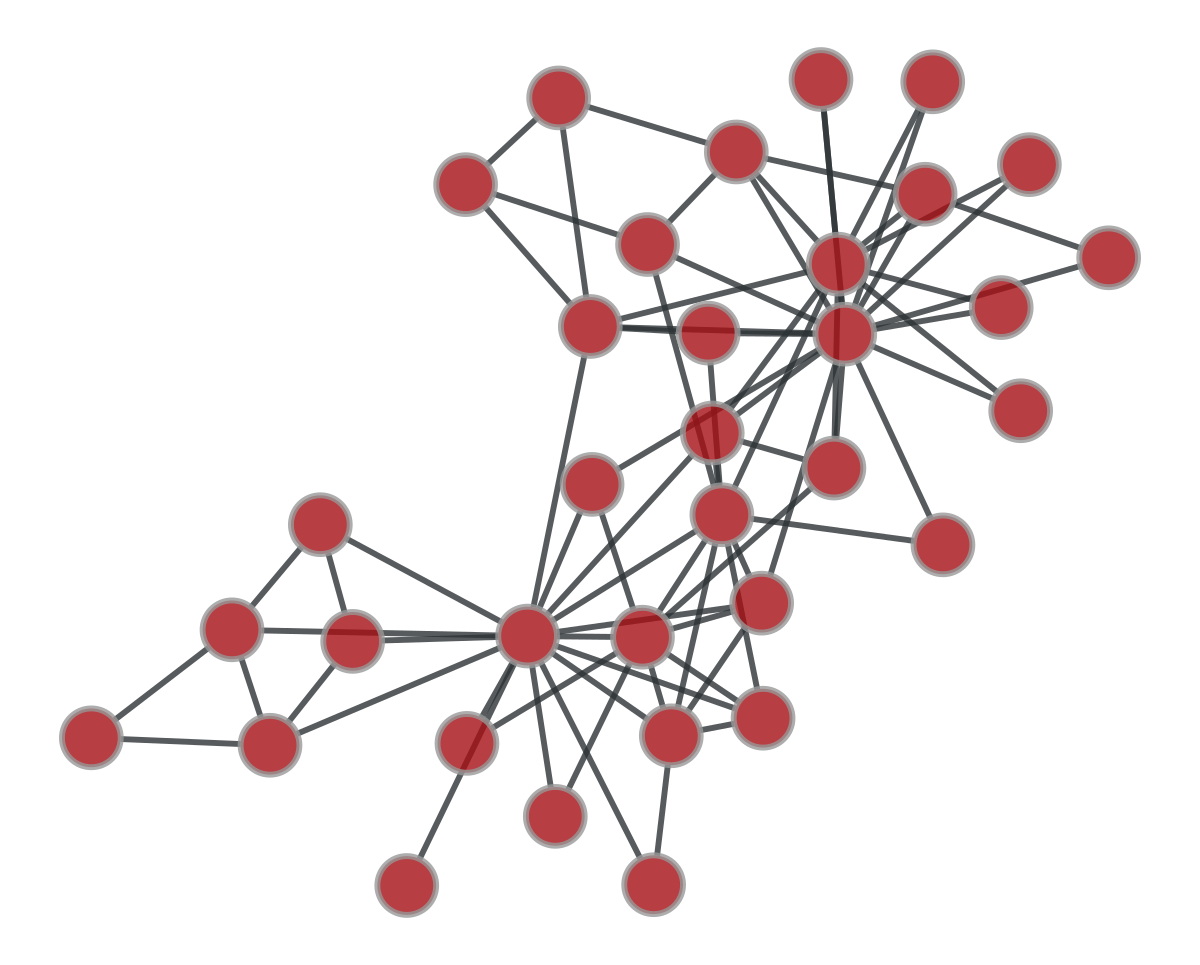

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac1b7828, at 0x7fd0ac1b7b70>

In [8]:
# draw initial graph
graph_draw(g, pos=pos)

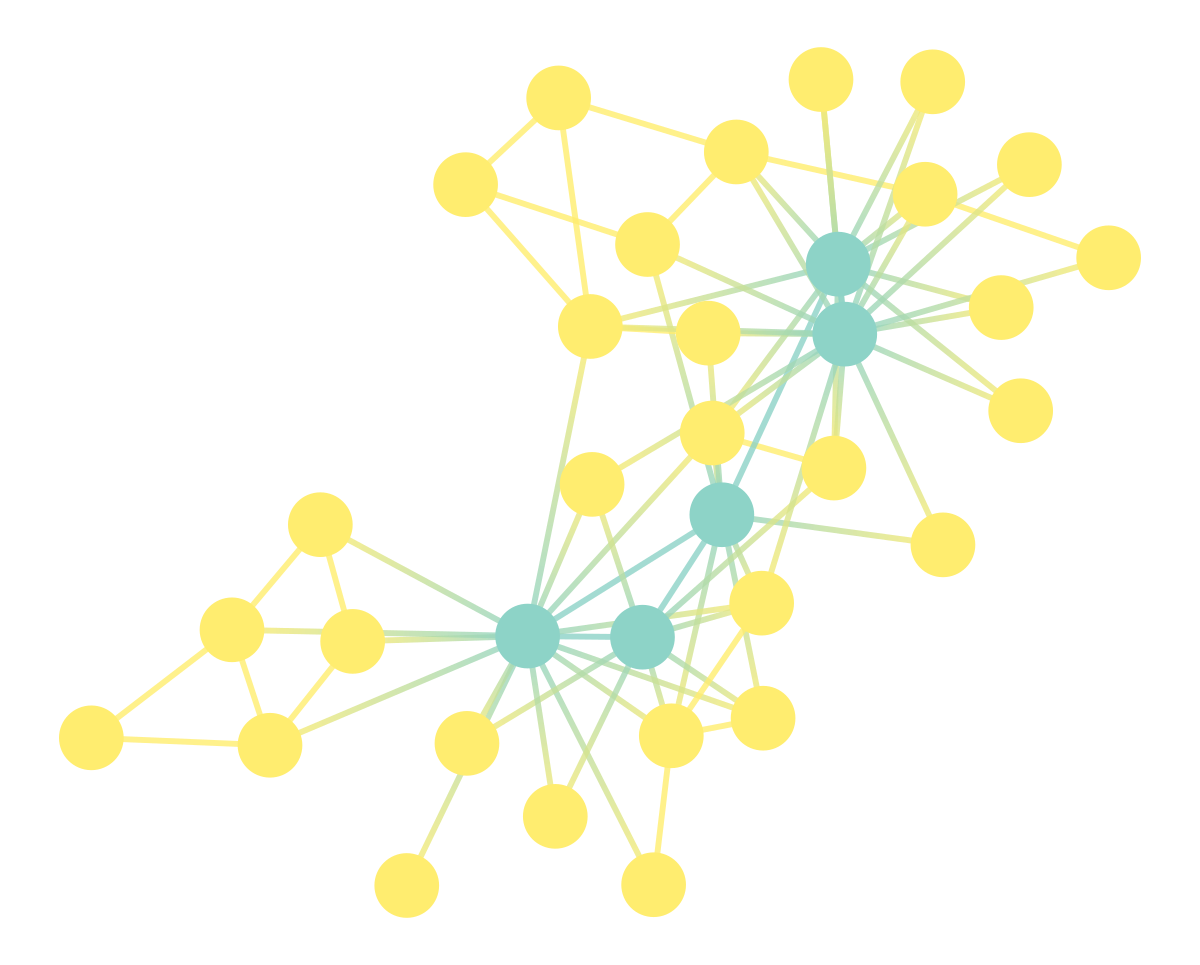

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac1b7828, at 0x7fd0ad79cd30>

In [9]:
# basic SBM inference: 
# captures core-periphery structure

seed_rng(2)
np.random.seed(2)

state_1 = minimize_blockmodel_dl(g, B_min=2, B_max=2, deg_corr=False)
state_1.draw(pos=pos)

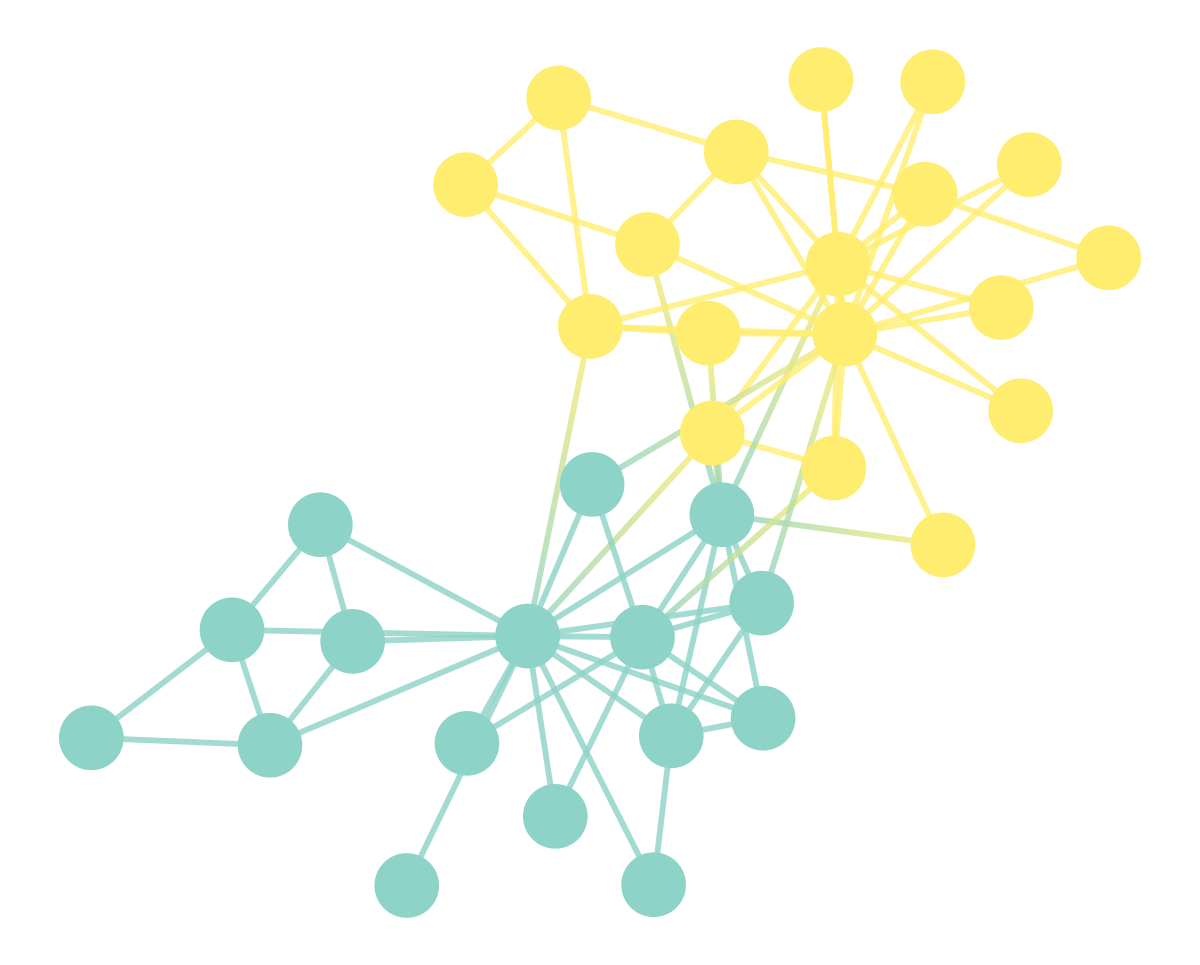

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fd0ac1b7828, at 0x7fd0ad7a39b0>

In [10]:
# degree-corrected SBM inference: 
# captures sociological partitioning

seed_rng(2)
np.random.seed(2)

state_2 = minimize_blockmodel_dl(g, B_min=2, B_max=2, deg_corr=True)
state_2.draw(pos=pos)